### Memory management in NEST

I_e =  (0.0,)
V_reset and V_the are  ((-70.0, -55.0),)
I_e =  (376.0,)


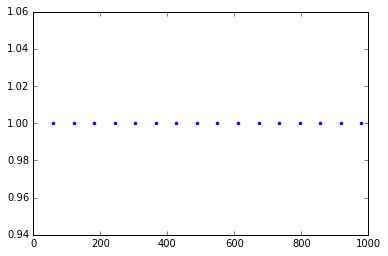

In [12]:
import nest
import pylab as pl #to plot figures
% matplotlib inline 

nest.ResetKernel()
dt = 0.1
nthreads = 1
nest.SetKernelStatus({'resolution': dt, 'local_num_threads': nthreads})

neuron = nest.Create('iaf_psc_alpha')

print 'I_e = ', nest.GetStatus(neuron, "I_e")
print 'V_reset and V_the are ', nest.GetStatus(neuron, ["V_reset", "V_th"])

nest.SetStatus(neuron,{'I_e':376.0})
print 'I_e = ', nest.GetStatus(neuron, "I_e")

# create a multimeter, a device we can use to record the 
# membrane voltage of a neuron over time.
multimeter = nest.Create("multimeter")

# We set its property withtime such that it will also 
# record the points in time at which it samples the 
# membrane voltage. The property record_from expects
# a list of the names of the variables we would like to record.
nest.SetStatus(multimeter,{"withtime":True,
                           "record_from":["V_m"], 
                           "interval":2*dt, 
                           "to_file": True, 
                           "label": "my_multimeter"}
              )

spikedetector = nest.Create("spike_detector",
                            params={"withgid" : True,
                                    "withtime": True})

nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

# start the simulation
nest.Simulate(1000.0) # time in ms

# Extracting and plotting data from devices
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
# pl.figure(1)
# pl.plot(ts,Vms)

# print nest.GetStatus(spikedetector)[0].keys()
# print nest.GetStatus(spikedetector)[0]['events']
dSD = nest.GetStatus(spikedetector,keys='events')[0]
evs = dSD['senders']
ts = dSD["times"]
pl.figure(2)
pl.plot(ts,evs,'.');
# pl.show()